# Udacity SDCND Project_1 : Finding lane lines


## In this project, Use computer vision technology to find lane lines in the picture 


### I will show you the overall process description and the results
### It is almost the same with solidWhiteRight process so I wil skip explanation



 





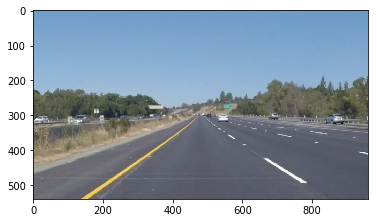

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('/home/nsslab/Documents/solidYellowLeft.jpg')
plt.imshow(image)




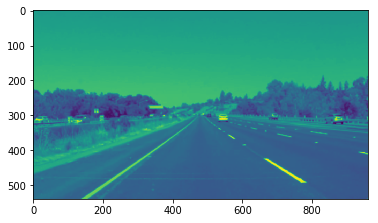

In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
plt.imshow(blur_gray)

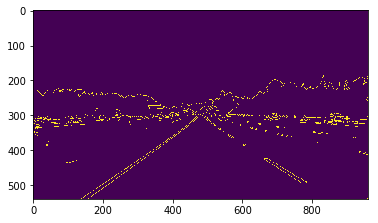

In [4]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges)

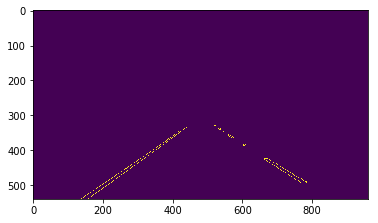

In [5]:
mask = np.zeros_like(edges)   
ignore_mask_color = 255   
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 330), (530,330), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges)

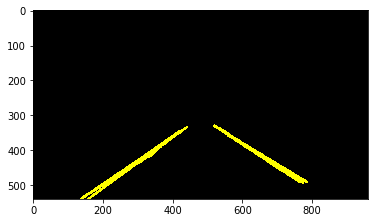

In [6]:
rho = 2 
theta = np.pi/180 
threshold = 15     
min_line_length = 50 
max_line_gap = 200    
line_image = np.copy(image)*0

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,255,0),5)
        
plt.imshow(line_image)        

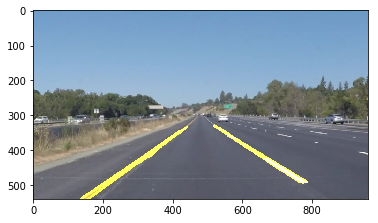

In [7]:
result = cv2.addWeighted(line_image, 1, image, 1, 0) 
plt.imshow(result)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import imageio
imageio.plugins.ffmpeg.download()

%matplotlib inline

image = mpimg.imread('/home/nsslab/Documents/solidYellowLeft.jpg')

def f_gay(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    return gray

def f_blurgray(gray,kernel_size):
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    return blur_gray

def f_canny(blur_gray, low_threshold, high_threshold):
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    return edges

def f_fillpoly(mask, vertices, ignore_mask_color, edges):
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edge = cv2.bitwise_and(edges, mask)
    return masked_edge

def f_hough(masked_edges, rho, theta, threshold, min_line_length, max_line_gap):
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    return lines

def f_drawline(blank_image,lines):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(255,255,0),5)
    return blank_image

def f_addweight(image, line_image):
    result = cv2.addWeighted(image, 1, line_image, 1, 0)
    return result


from moviepy.editor import VideoFileClip
from IPython.display import HTML

def f_result(image):
    
    gray = f_gay(image)
    
    kernel_size = 5 # Must be an odd number (3, 5, 7...)
    blur_gray = f_blurgray(gray,kernel_size)

    low_threshold = 50
    high_threshold = 150
    edges = f_canny(blur_gray, low_threshold, high_threshold)

    mask = np.zeros_like(edges)   
    ignore_mask_color = 255 
    
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(450, 330), (530,330), (imshape[1],imshape[0])]], dtype=np.int32)

    masked_edges = f_fillpoly(mask, vertices, ignore_mask_color, edges)
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 120 #minimum number of pixels making up a line
    max_line_gap = 80    # maximum gap in pixels between connectable line segments
    blank_image = np.copy(image)*0 

    lines = f_hough(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)

    line_image = f_drawline(blank_image, lines)    

    result = f_addweight(image,line_image)
    return result

white_output = 'solidYellowLeft0.mp4'
clip1 = VideoFileClip("/home/nsslab/Videos/solidYellowLeft.mp4")
white_clip = clip1.fl_image(f_result) 
%time white_clip.write_videofile(white_output , audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))




[MoviePy] >>>> Building video solidYellowLeft0.mp4
[MoviePy] Writing video solidYellowLeft0.mp4


100%|█████████▉| 681/682 [00:09<00:00, 68.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: solidYellowLeft0.mp4 

CPU times: user 25.8 s, sys: 500 ms, total: 26.3 s
Wall time: 10.3 s
